<a href="https://colab.research.google.com/github/Husted42/Husted42/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final assignment

## Task 1 - Portfolio optimization

### Task 1.a - Diversification
Choose financial stock indices (at least 7) for different markets or sectors. Time interval 20 years, monthly data. When necessary, convert all values in one domestic currency (e.g. USD).

We have chosen:

Asia:
  - iShares MSCI Japan ETF (EWJ)
  - iShares MSCI Hong Kong ETF (EWH)

America
 - IShares U.S. Financials ETF (IVF)
 - iShares Biotechnology ETF (IBB)

Europe
 - EZU
 - ^990500-EUR-STRD

Global energy
 - iShares MSCI BIC ETF (IXF)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf

import numpy as np
from scipy.optimize import minimize

In [ ]:
start = dt.datetime(2003,1,1)
end = dt.datetime(2023,12,1)

tickers = ['EWJ', 'EWH', 'IYF', 'IBB', 'IXC', 'EZU', '^990500-EUR-STRD']
price_data = yf.download(tickers, start=start, end=end, interval='1mo')
stocks = price_data['Adj Close'][tickers]
stocks = stocks.dropna()

[*********************100%***********************]  7 of 7 completed


In [ ]:
print(stocks)

Ticker            EWJ        EWH        IYF         IBB        IXC        EZU  \
Date                                                                            
2003-01-01  20.021973   3.871308  22.394556   15.577427   7.851431  11.584723   
2003-02-01  20.228998   3.798851  21.749462   15.346505   7.913393  11.174154   
2003-03-01  19.105156   3.534899  21.689280   16.420921   7.948799  10.710876   
2003-04-01  18.957283   3.586654  24.299034   18.377323   8.003677  12.600053   
2003-05-01  20.081112   3.938591  25.604609   21.828281   8.772005  13.546028   
...               ...        ...        ...         ...        ...        ...   
2023-07-01  61.128548  18.715656  77.839767  128.672729  38.081310  45.346313   
2023-08-01  59.412865  16.975969  75.340179  128.075699  38.745853  43.307953   
2023-09-01  58.111645  16.040655  73.281708  121.687340  39.737850  40.805885   
2023-10-01  56.829697  15.694589  71.504242  113.261497  38.081310  39.704590   
2023-11-01  60.347820  15.72

In [ ]:
stocks = np.log((stocks / stocks.shift(1))[1:])

### Task 1.b - Estimate
Expected yearly returns and covariance matrix with a rolling window of 10 years (in annual steps)

In [ ]:
'''
  Create a dataframe contaning all the sums for each time period
  With tickers as columns and stock mean for intval as rows
'''

start_years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
end_years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Empty dataframe
df_means = pd.DataFrame(index=start_years, columns=tickers)
lst_cov = []

# Loop through years
for i in range(len(start_years)):
    print(start_years[i], end_years[i])
    tmp_stocks = stocks.loc[start_years[i]:end_years[i]]
    print(tmp_stocks.tail(n = 10))

    # Mean
    tmp_stocks_mean = tmp_stocks.mean()
    df_means.loc[start_years[i]] = tmp_stocks_mean

    # Covariance
    tmp_stocks_cov = tmp_stocks.cov()
    lst_cov.append(tmp_stocks_cov)

2003 2012
Ticker           EWJ       EWH       IYF       IBB       IXC       EZU  \
Date                                                                     
2012-03-01  0.018841 -0.044825  0.060582  0.034993 -0.043774  0.001269   
2012-04-01 -0.044184  0.005714 -0.010072  0.017032 -0.012394 -0.057737   
2012-05-01 -0.091314 -0.097478 -0.087137 -0.017539 -0.123654 -0.138051   
2012-06-01  0.056846  0.029705  0.043252  0.053336  0.043675  0.056580   
2012-07-01 -0.036070  0.043706  0.005988  0.030664  0.037867  0.019102   
2012-08-01  0.007756  0.014227  0.028141  0.019024  0.037511  0.064125   
2012-09-01  0.012068  0.068797  0.023776  0.044528  0.019513  0.036257   
2012-10-01 -0.012068  0.016349  0.016301 -0.075805 -0.010479  0.025301   
2012-11-01  0.029366  0.032441 -0.002375  0.050857 -0.017888  0.033502   
2012-12-01  0.044032  0.016092  0.030273 -0.011088  0.000523  0.048686   

Ticker      ^990500-EUR-STRD  
Date                          
2012-03-01         -0.004386  
2012-04-

#### Print

In [ ]:
print("Mean pr ticker")
print(df_means * (12))

print("\n\nCovariance matricies")
for i in range(len(lst_cov)):
    print('\nYear : ', start_years[i], '\n', '\n', lst_cov[i] * (12), '\n', '-'*100,)

Mean pr ticker
           EWJ       EWH       IYF       IBB       IXC       EZU  \
2003  0.046631  0.123107  0.010248  0.106099  0.114116  0.075051   
2004  0.034328  0.101946  0.010908  0.116396  0.099729   0.06016   
2005  0.015569  0.083239  0.011612  0.140853  0.063943  0.030853   
2006  0.002441  0.075345  0.005525  0.149371  0.012126  0.021169   
2007 -0.000666  0.050214  0.003952  0.124573  0.018688 -0.007687   
2008   0.02754  0.046071  0.042067  0.139197 -0.001887  0.000973   
2009  0.043448  0.110326  0.102607  0.142395  0.027117  0.043124   
2010  0.057692  0.074763    0.1139  0.150706   0.01374  0.039579   
2011  0.059849   0.05675  0.101322  0.159992 -0.032642  0.049093   
2012  0.076564  0.070899  0.143246  0.149889  0.002218  0.082467   
2013  0.049193  0.037453  0.107922  0.107317  0.038527  0.042362   

     ^990500-EUR-STRD  
2003         0.035754  
2004         0.032004  
2005         0.027069  
2006         0.011889  
2007        -0.003875  
2008         0.003076  


### Task 1.c - Efficient frontier
Show in one or more figures the 11 different efficient frontiers (one for each rolling window) and explain in your report the diversification benefit.


In [ ]:
def highest_slope_portfolio(ymean, ycov, Rf):
    n = ycov.shape[0]
    Rp = ymean[0][0]

    A = np.zeros((n+1,n+1))

    A[:-1,:-1] = 2*ycov
    A[:n,-1] = -(ymean.T-Rf)
    A[-1,:n] = ymean.T-Rf
    b = np.zeros((n+1,1))
    b[-1,0] = Rp-Rf
    X = np.linalg.solve(A, b)
    X = (X[:-1]/np.sum(X[:-1])).reshape(-1,1)

    opt_var = X.T @ ycov @ X
    opt_sigma = np.sqrt(opt_var)
    opt_mu = X.T @ ymean

    return X, opt_sigma.item(), opt_mu.item()

In [ ]:
eff_frontier = {}

i = 0
for year in start_years:
  mu = df_means.iloc[i].to_numpy().reshape(-1,1) * 12
  cov = lst_cov[i].to_numpy() * 12
  Rf = 0

  X, opt_sigma, opt_mu = highest_slope_portfolio(mu, cov, Rf)
  X2, _, _ = highest_slope_portfolio(mu, cov, Rf+0.03)

  eff_frontier[year] = {
    'weights' : X,
    'sigma' : opt_sigma,
    'mu' : opt_mu,
    'weights2' : X2
  }
  i = i + 1

print(eff_frontier)

{'2003': {'weights': array([[ 0.13740824],
       [ 0.57538856],
       [-0.71132671],
       [ 1.00760515],
       [ 0.57949867],
       [-0.26527431],
       [-0.3232996 ]]), 'sigma': 0.2303733408937245, 'mu': 0.21151985852433802, 'weights2': array([[-0.09850514],
       [ 1.22289211],
       [-1.48977163],
       [ 1.82947292],
       [ 1.12527924],
       [ 0.01966055],
       [-1.60902805]])}, '2004': {'weights': array([[ 0.04602189],
       [ 0.44309149],
       [-0.45137789],
       [ 1.27600014],
       [ 0.79985101],
       [-0.60423446],
       [-0.50935219]]), 'sigma': 0.22823783326561023, 'mu': 0.2174648207317335, 'weights2': array([[-0.2959026 ],
       [ 0.89582887],
       [-0.89941389],
       [ 2.42179272],
       [ 1.60518414],
       [-0.70807643],
       [-2.0194128 ]])}, '2005': {'weights': array([[-0.18508756],
       [ 0.44887267],
       [-0.33070132],
       [ 1.42512329],
       [ 0.53523571],
       [-0.76556437],
       [-0.12787841]]), 'sigma': 0.2383045076

In [ ]:
large_n = 100
mu_p = np.zeros((len(start_years), 2* large_n + 1))
std_p = np.zeros((len(start_years), 2* large_n + 1))

l = 0
for j in range(len(start_years)):
  mu = df_means.iloc[l].to_numpy().reshape(-1,1) * 12
  cov = lst_cov[l].to_numpy() * 12
  for i in range(2*large_n+1):

    curr_port = (i/large_n) * eff_frontier[start_years[j]]['weights'] + (1-i/large_n) * eff_frontier[start_years[j]]['weights2']
    mu_p[j,i] = (curr_port.T @ mu).item()
    std_p[j,i] = np.sqrt((curr_port.T @ cov @ curr_port).item())

  l += 1

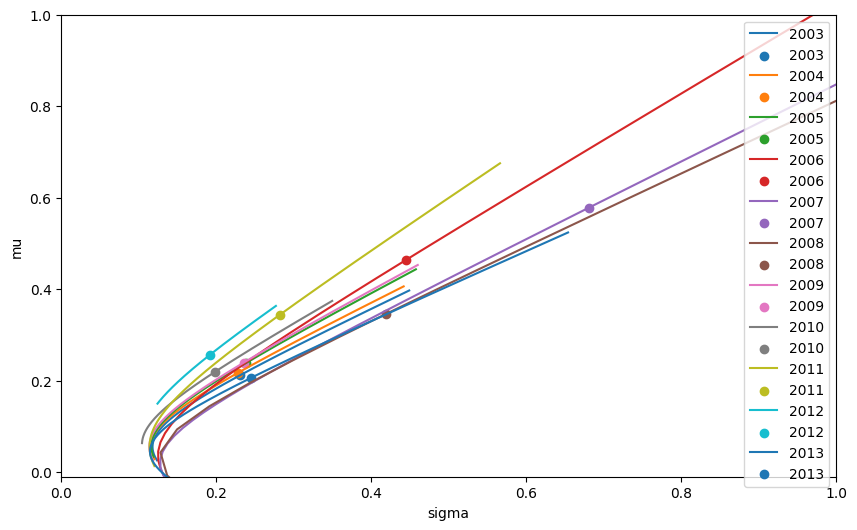

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))
for i in range(len(start_years)):
  #ax.plot(eff_frontier[start_years[i]]['sigma'], eff_frontier[start_years[i]]['mu'], label=start_years[i])
  ax.plot(std_p[i,:], mu_p[i,:], label=start_years[i])
  ax.scatter(eff_frontier[start_years[i]]['sigma'], eff_frontier[start_years[i]]['mu'], label=start_years[i])

ax.set(xlim=(0, 1), ylim=(-.01, 1))
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.legend()
plt.show()

### Task 1.d - Tobin separation
Repeat the assignment c), now including a risk-free
rate of 1%. What are the consequences for the portfolio management in such a world?

In [ ]:
eff_frontier = {}

i = 0
for year in start_years:
  mu = df_means.iloc[i].to_numpy().reshape(-1,1) * 12
  cov = lst_cov[i].to_numpy() * 12
  Rf = 0.01

  X, opt_sigma, opt_mu = highest_slope_portfolio(mu, cov, Rf)
  X2, opt_sigma_2, opt_mu_2 = highest_slope_portfolio(mu, cov, Rf+0.03)

  eff_frontier[year] = {
    'weights' : X,
    'sigma' : opt_sigma,
    'mu' : opt_mu,
    'weights2' : X2,
    'mu2' : opt_mu_2,
    'sigma2' : opt_sigma_2
  }
  i = i + 1

print(eff_frontier)

{'2003': {'weights': array([[ 0.09352417],
       [ 0.69583571],
       [-0.85613127],
       [ 1.16048713],
       [ 0.68102353],
       [-0.21227137],
       [-0.5624679 ]]), 'sigma': 0.2689131905167601, 'mu': 0.24605038629477322, 'weights2': array([[-0.38334763],
       [ 2.00468975],
       [-2.42966828],
       [ 2.82179844],
       [ 1.78425628],
       [ 0.36369173],
       [-3.16142029]]), 'mu2': 0.6212807157959646, 'sigma2': 0.7268358439336906}, '2004': {'weights': array([[-0.01809836],
       [ 0.5279922 ],
       [-0.53539696],
       [ 1.49086776],
       [ 0.95087312],
       [-0.62370768],
       [-0.79253009]]), 'sigma': 0.26625788791196714, 'mu': 0.25283919117021597, 'weights2': array([[-0.69983607],
       [ 1.43067145],
       [-1.42870249],
       [ 3.77537803],
       [ 2.5565667 ],
       [-0.83075044],
       [-3.80332718]]), 'mu2': 0.6289457051436467, 'sigma2': 0.7071005910573486}, '2005': {'weights': array([[-0.30617025],
       [ 0.5373528 ],
       [-0.3822223

In [ ]:
large_n = 100 # 100 Combinations
mu_p = np.zeros((len(start_years), 2* large_n + 1))
std_p = np.zeros((len(start_years), 2* large_n + 1))

l = 0
for j in range(len(start_years)):
  mu = df_means.iloc[l].to_numpy().reshape(-1,1) * 12
  cov = lst_cov[l].to_numpy() * 12
  for i in range(2*large_n+1):

    curr_port = (i/large_n) * eff_frontier[start_years[j]]['weights'] + (1-i/large_n) * eff_frontier[start_years[j]]['weights2']
    mu_p[j,i] = (curr_port.T @ mu).item()
    std_p[j,i] = np.sqrt((curr_port.T @ cov @ curr_port).item())

  l += 1

We notice that it only makes sense to look at the upper part of the

[p. 96]
 The efficient frontier is the entire length of the ray. Different points along the efficient frontier represents different amounts of borrowing and/or
 lending in combination with the optimum portfolio of risky assets. St. if lending and borrowing is allowed it would not make sense to choose another combination of the portfolio than along effecient frontier. Because along the efficient frontier you get the highest expected return for the same risk. If however, lending and borrowing is not allowed the the investor should chosse a portfolio along the

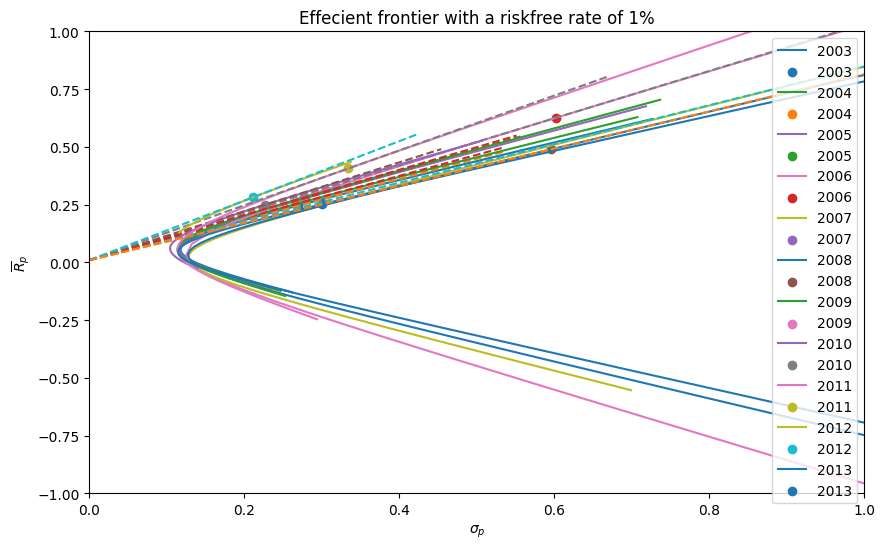

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))
for i in range(len(start_years)):
  ax.plot(std_p[i,:], mu_p[i,:], label=start_years[i])
  ax.scatter(eff_frontier[start_years[i]]['sigma'], eff_frontier[start_years[i]]['mu'], label=start_years[i])
  ax.plot([0, 2*eff_frontier[start_years[i]]['sigma']], [Rf, (Rf+(eff_frontier[start_years[i]]['mu']-Rf)/eff_frontier[start_years[i]]['sigma'] * 2*eff_frontier[start_years[i]]['sigma'])], linestyle="--")

ax.set(xlim=(0, 1), ylim=(-1, 1))
ax.set_title("Effecient frontier with a riskfree rate of 1%")
ax.set_xlabel("$\sigma_p$")
ax.set_ylabel("$\overline{R}_p$")
ax.legend()
plt.show()

### Task 1.e - Asset allocation
Choose a constant required return and calculate the optimal asset allocation for the case of the Tobin separation efficient frontier in the different years. How high is the portfolio turnover on average each year?

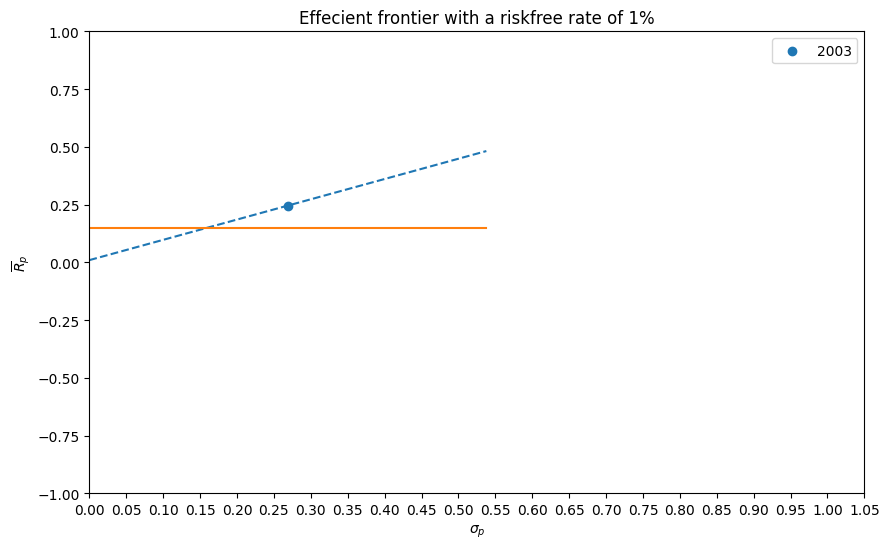

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))
for i in range(1):
  x_ = [0, 2*eff_frontier[start_years[i]]['sigma']]
  y_ = [Rf, (Rf+(eff_frontier[start_years[i]]['mu']-Rf)/eff_frontier[start_years[i]]['sigma'] * 2*eff_frontier[start_years[i]]['sigma'])]
  ax.plot(x_, y_, linestyle="--")
  ax.scatter(eff_frontier[start_years[i]]['sigma'], eff_frontier[start_years[i]]['mu'], label=start_years[i])  # Optimal points
  ax.plot(x_, np.ones(len(x_)) * 0.15 )


ax.set(xlim=(0, 1), ylim=(-1, 1))
ax.set_xticks(list(np.arange(0, 1.1, 0.05)))
# ax.yticks = np.arange(0, 1.1, 0.1)
ax.set_title("Effecient frontier with a riskfree rate of 1%")
ax.set_xlabel("$\sigma_p$")
ax.set_ylabel("$\overline{R}_p$")
ax.legend()
plt.show()

In [ ]:
# Suppose:
# df_means.iloc[0] is a vector of expected returns for each asset
# target_return = 0.15
# risk_free = 0.01

# Define the function whose root we want:
# sum(X * asset_returns) + (1 - sum(X)) * risk_free - target_return = 0
# We'll turn this into a minimization problem by minimizing the absolute difference.

def objective(X, asset_returns, target, rf):
    # Calculate the portfolio return given weights X
    portfolio_return = np.sum(X * asset_returns) + (1 - np.sum(X)) * rf
    # We want this to be as close to target as possible, so minimize the squared error
    return (portfolio_return - target)**2

def asset_allocation(asset_returns, target_return, risk_free):
  # Constraint: sum of weights = 1
  constraints = [
      {'type': 'eq', 'fun': lambda X: np.sum(X) - 1}
  ]

  # Initial guess: equal weighting
  initial_guess = np.full_like(asset_returns, 1.0 / len(asset_returns))

  result = minimize(
      objective,
      initial_guess,
      args=(asset_returns, target_return, risk_free),
      constraints=constraints,
      method='SLSQP'  # SLSQP is a good choice for handling equality constraints
  )

  if result.success:
      X_solution = result.x
      print("Optimized weights:", X_solution)
      print("Sum of weights:", np.sum(X_solution))
      # Check the final portfolio return
      final_return = np.sum(X_solution * asset_returns) + (1 - np.sum(X_solution)) * risk_free
      sigma_ = (X_solution @ np.sqrt(asset_variances))
      print("sigma: ", sigma_)

      print("Final portfolio return:", final_return)
  else:
      print("Optimization failed:", result.message)
  return X_solution


lst_weights = []
portfolio_turnover = []
for i in range(len(start_years)):
  asset_returns = df_means.iloc[i].values * 12
  asset_variances = lst_cov[0].to_numpy().diagonal()
  target_return = 0.3
  risk_free = 0.01
  weights = asset_allocation(asset_returns, target_return, risk_free)
  lst_weights.append(weights)

  if i != 0:
    previous_weights = lst_weights[i-1]
    turnover = np.sum(np.abs(weights - previous_weights))
    portfolio_turnover.append(turnover)
    print(turnover, '\n\n')


Optimized weights: [-0.38586122  1.14751236 -1.11536455  0.80648791  0.96723933  0.18395509
 -0.60396891]
Sum of weights: 1.0
sigma:  0.07230064344137536
Final portfolio return: 0.299999998988893
Optimized weights: [-0.56574542  0.99297747 -1.10561169  1.32607828  0.94187472  0.02974018
 -0.61931355]
Sum of weights: 0.9999999999999999
sigma:  0.06810800519680156
Final portfolio return: 0.3000000032667949
1.0586864753791292 


Optimized weights: [-0.57167633  0.70964498 -0.64659973  1.80055765  0.34427133 -0.28227255
 -0.35392535]
Sum of weights: 1.0
sigma:  0.056665239964459366
Final portfolio return: 0.30000000108846897
2.3977590495081538 


Optimized weights: [-0.40404128  0.66619779 -0.3587667   1.75292471 -0.26186174 -0.12911401
 -0.26533878]
Sum of weights: 0.9999999999999999
sigma:  0.055445276021602756
Final portfolio return: 0.29999999876762334
1.3944264055617077 


Optimized weights: [-0.40351254  0.62142475 -0.31048551  2.1192943  -0.01364122 -0.54493256
 -0.46814721]
Sum of 

In [ ]:
required_return = 0.3  # Example required return, adjust as needed

portfolio_turnover = []

for year in start_years:
    # Access the efficient frontier data for the current year
    frontier_data = eff_frontier[year]

    weights = None
    min_difference = float('inf')

    for i in range(len(mu_p[start_years.index(year)])):
      difference = abs(mu_p[start_years.index(year)][i] - required_return)
      if difference < min_difference:
        min_difference = difference
        weights = (i/large_n) * eff_frontier[year]['weights'] + (1-i/large_n) * eff_frontier[year]['weights2']

    # Calculate portfolio turnover (assuming previous year's weights are available)
    if year != start_years[0]:  # Skip turnover calculation for the first year
      previous_weights = eff_frontier[start_years[start_years.index(year)-1]]['weights']
      turnover = np.sum(np.abs(weights - previous_weights))
      portfolio_turnover.append(turnover)

    # Print or store the optimal asset allocation for the current year
    print(f"\n Optimal asset allocation for {year}:")
    for i, ticker in enumerate(tickers):
        print(f"{ticker}: {weights[i][0]:.4f}")
    print(f"Sum of weights: {np.sum(weights):.4f}")
    if year != start_years[0]:
      print(f"Portfolio Turnover for {year}: {turnover:.4f}")

# Calculate and print the average portfolio turnover
if portfolio_turnover:
    average_turnover = np.mean(portfolio_turnover)
    print(f"\nAverage portfolio turnover: {average_turnover:.4f}")
    print(portfolio_turnover)
else:
    print("\nNot enough data to calculate average portfolio turnover.")


 Optimal asset allocation for 2003:
EWJ: 0.0268
EWH: 0.8791
IYF: -1.0764
IBB: 1.3931
IXC: 0.8355
EZU: -0.1316
^990500-EUR-STRD: -0.9263
Sum of weights: 1.0000

 Optimal asset allocation for 2004:
EWJ: -0.1067
EWH: 0.6453
IYF: -0.6515
IBB: 1.7879
IXC: 1.1596
EZU: -0.6506
^990500-EUR-STRD: -1.1839
Sum of weights: 1.0000
Portfolio Turnover for 2004: 2.6211

 Optimal asset allocation for 2005:
EWJ: -0.3804
EWH: 0.5916
IYF: -0.4138
IBB: 1.8291
IXC: 0.6924
EZU: -0.8653
^990500-EUR-STRD: -0.4535
Sum of weights: 1.0000
Portfolio Turnover for 2005: 1.7249

 Optimal asset allocation for 2006:
EWJ: -0.2587
EWH: 0.6884
IYF: -0.2797
IBB: 1.6365
IXC: 0.1340
EZU: -0.6288
^990500-EUR-STRD: -0.2918
Sum of weights: 1.0000
Portfolio Turnover for 2006: 1.0753

 Optimal asset allocation for 2007:
EWJ: -0.2962
EWH: 0.6544
IYF: 0.0101
IBB: 1.9256
IXC: 0.8198
EZU: -1.2307
^990500-EUR-STRD: -0.8830
Sum of weights: 1.0000
Portfolio Turnover for 2007: 6.2462

 Optimal asset allocation for 2008:
EWJ: 0.1771
EWH:

### Task 1.f - Backtest
Conduct a backtest (ex-post) for the optimized portfolio (with annual re-balancing, see point e). Calculate the average return and the standard deviation for your ex-post portfolio out of sample? (i.e. your portfolio is created by calculating the mean and covariance in-sample to find your optimal portfolio, BUT then you hold your portfolio for one year out-of-sample and calculate the return you have had during this period. Then you repeat the same process again and again for each period.)


### Task 1.g - Beta
Use a broad stock index to test, whether our portfolio is in line with the CAPM prediction: $\bar{R}_P = R_F + (\bar{R}_M - R_F)\beta_P$

### Task 1.h - Timing
Calculate the Treynor-Mazuy measure and give an interpretation to these results (portfolio returns)

## Task 2 - Bonds

### Task 2.a - Yield
Use five different "real" bonds and calculate for these bonds the yield to maturity, duration and convexity.

### Task 2.b - Duration and convexity
Calculate the duration and convexity of a portfolio of these bonds, if EUR 100.000,- is invested in each of them

### Task 2.c - Potential decline
Estimate the potential decline in the market value of your portfolio, if the yield increases by 150 basis points.

